In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [2]:
db = pd.read_csv("C:/Users/thale/Desktop/Faculdade_e_Trabalho/IC/IC2019/weatherAUS.csv")
db


Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  \
0       2008-12-01   Albury     13.4     22.9       0.6          NaN   
1       2008-12-02   Albury      7.4     25.1       0.0          NaN   
2       2008-12-03   Albury     12.9     25.7       0.0          NaN   
3       2008-12-04   Albury      9.2     28.0       0.0          NaN   
4       2008-12-05   Albury     17.5     32.3       1.0          NaN   
...            ...      ...      ...      ...       ...          ...   
142188  2017-06-20    Uluru      3.5     21.8       0.0          NaN   
142189  2017-06-21    Uluru      2.8     23.4       0.0          NaN   
142190  2017-06-22    Uluru      3.6     25.3       0.0          NaN   
142191  2017-06-23    Uluru      5.4     26.9       0.0          NaN   
142192  2017-06-24    Uluru      7.8     27.0       0.0          NaN   

        Sunshine WindGustDir  WindGustSpeed WindDir9am  ... Humidity3pm  \
0            NaN           W           44.0          W  ...        22.0   
1            NaN         WNW           44.0        NNW  ...        25.0   
2            NaN         WSW           46.0          W  ...        30.0   
3            NaN          NE           24.0         SE  ...        16.0   
4            NaN           W           41.0        ENE  ...        33.0   
...          ...         ...            ...        ...  ...         ...   
142188       NaN           E           31.0        ESE  ...        27.0   
142189       NaN           E           31.0         SE  ...        24.0   
142190       NaN         NNW           22.0         SE  ...        21.0   
142191       NaN           N           37.0         SE  ...        24.0   
142192       NaN          SE           28.0        SSE  ...        24.0   

        Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
0            1007.7       1007.1       8.0       NaN     16.9     21.8   
1            1010.6       1007.8       NaN       NaN     17.2     24.3   
2            1007.6       1008.7       NaN       2.0     21.0     23.2   
3            1017.6       1012.8       NaN       NaN     18.1     26.5   
4            1010.8       1006.0       7.0       8.0     17.8     29.7   
...             ...          ...       ...       ...      ...      ...   
142188       1024.7       1021.2       NaN       NaN      9.4     20.9   
142189       1024.6       1020.3       NaN       NaN     10.1     22.4   
142190       1023.5       1019.1       NaN       NaN     10.9     24.5   
142191       1021.0       1016.8       NaN       NaN     12.5     26.1   
142192       1019.4       1016.5       3.0       2.0     15.1     26.0   

        RainToday  RISK_MM  RainTomorrow  
0              No      0.0            No  
1              No      0.0            No  
2              No      0.0            No  
3              No      1.0            No  
4              No      0.2            No  
...           ...      ...           ...  
142188         No      0.0            No  
142189         No      0.0            No  
142190         No      0.0            No  
142191         No      0.0            No  
142192         No      0.0            No  

[142193 rows x 24 columns]

In [4]:
# limpando dados nao uteis
db = db.drop(columns=['Sunshine','Evaporation','Cloud3pm','Cloud9am','Location','RISK_MM','Date','WindGustDir','WindDir9am','WindDir3pm'],axis=1)
db = db.dropna(how='any') 
#apagando pontos fora da curva  #devia tentar deixar os pontos fora da curva?
from scipy import stats
z = np.abs(stats.zscore(db._get_numeric_data()))
print(z)
db= db[(z < 3).all(axis=1)]
#transformando alguns dados escritos em numeros
db['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
db['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)
print(db.shape)
db

[[0.15915995 0.08387    0.20329958 ... 1.16149309 0.04431849 0.02614842]
 [0.78312355 0.2310207  0.274179   ... 1.06176919 0.00219751 0.3397351 ]
 [0.08063632 0.31689998 0.274179   ... 0.93355274 0.59140008 0.17874635]
 ...
 [1.3799031  0.25964712 0.274179   ... 0.54805952 0.97463834 0.36900578]
 [1.09721805 0.48865854 0.274179   ... 0.22039527 0.72655305 0.60317123]
 [0.72030465 0.50297175 0.274179   ... 0.17765645 0.32341444 0.58853589]]
(114424, 14)


MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
142188      3.5     21.8       0.0           31.0          15.0          13.0   
142189      2.8     23.4       0.0           31.0          13.0          11.0   
142190      3.6     25.3       0.0           22.0          13.0           9.0   
142191      5.4     26.9       0.0           37.0           9.0           9.0   
142192      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
142188         59.0         27.0       1024.7       1021.2      9.4     20.9   
142189         51.0         24.0       1024.6       1020.3     10.1     22.4   
142190         56.0         21.0       1023.5       1019.1     10.9     24.5   
142191         53.0         24.0       1021.0       1016.8     12.5     26.1   
142192         51.0         24.0       1019.4       1016.5     15.1     26.0   

        RainToday  RainTomorrow  
0               0             0  
1               0             0  
2               0             0  
3               0             0  
4               0             0  
...           ...           ...  
142188          0             0  
142189          0             0  
142190          0             0  
142191          0             0  
142192          0             0  

[114424 rows x 14 columns]

C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


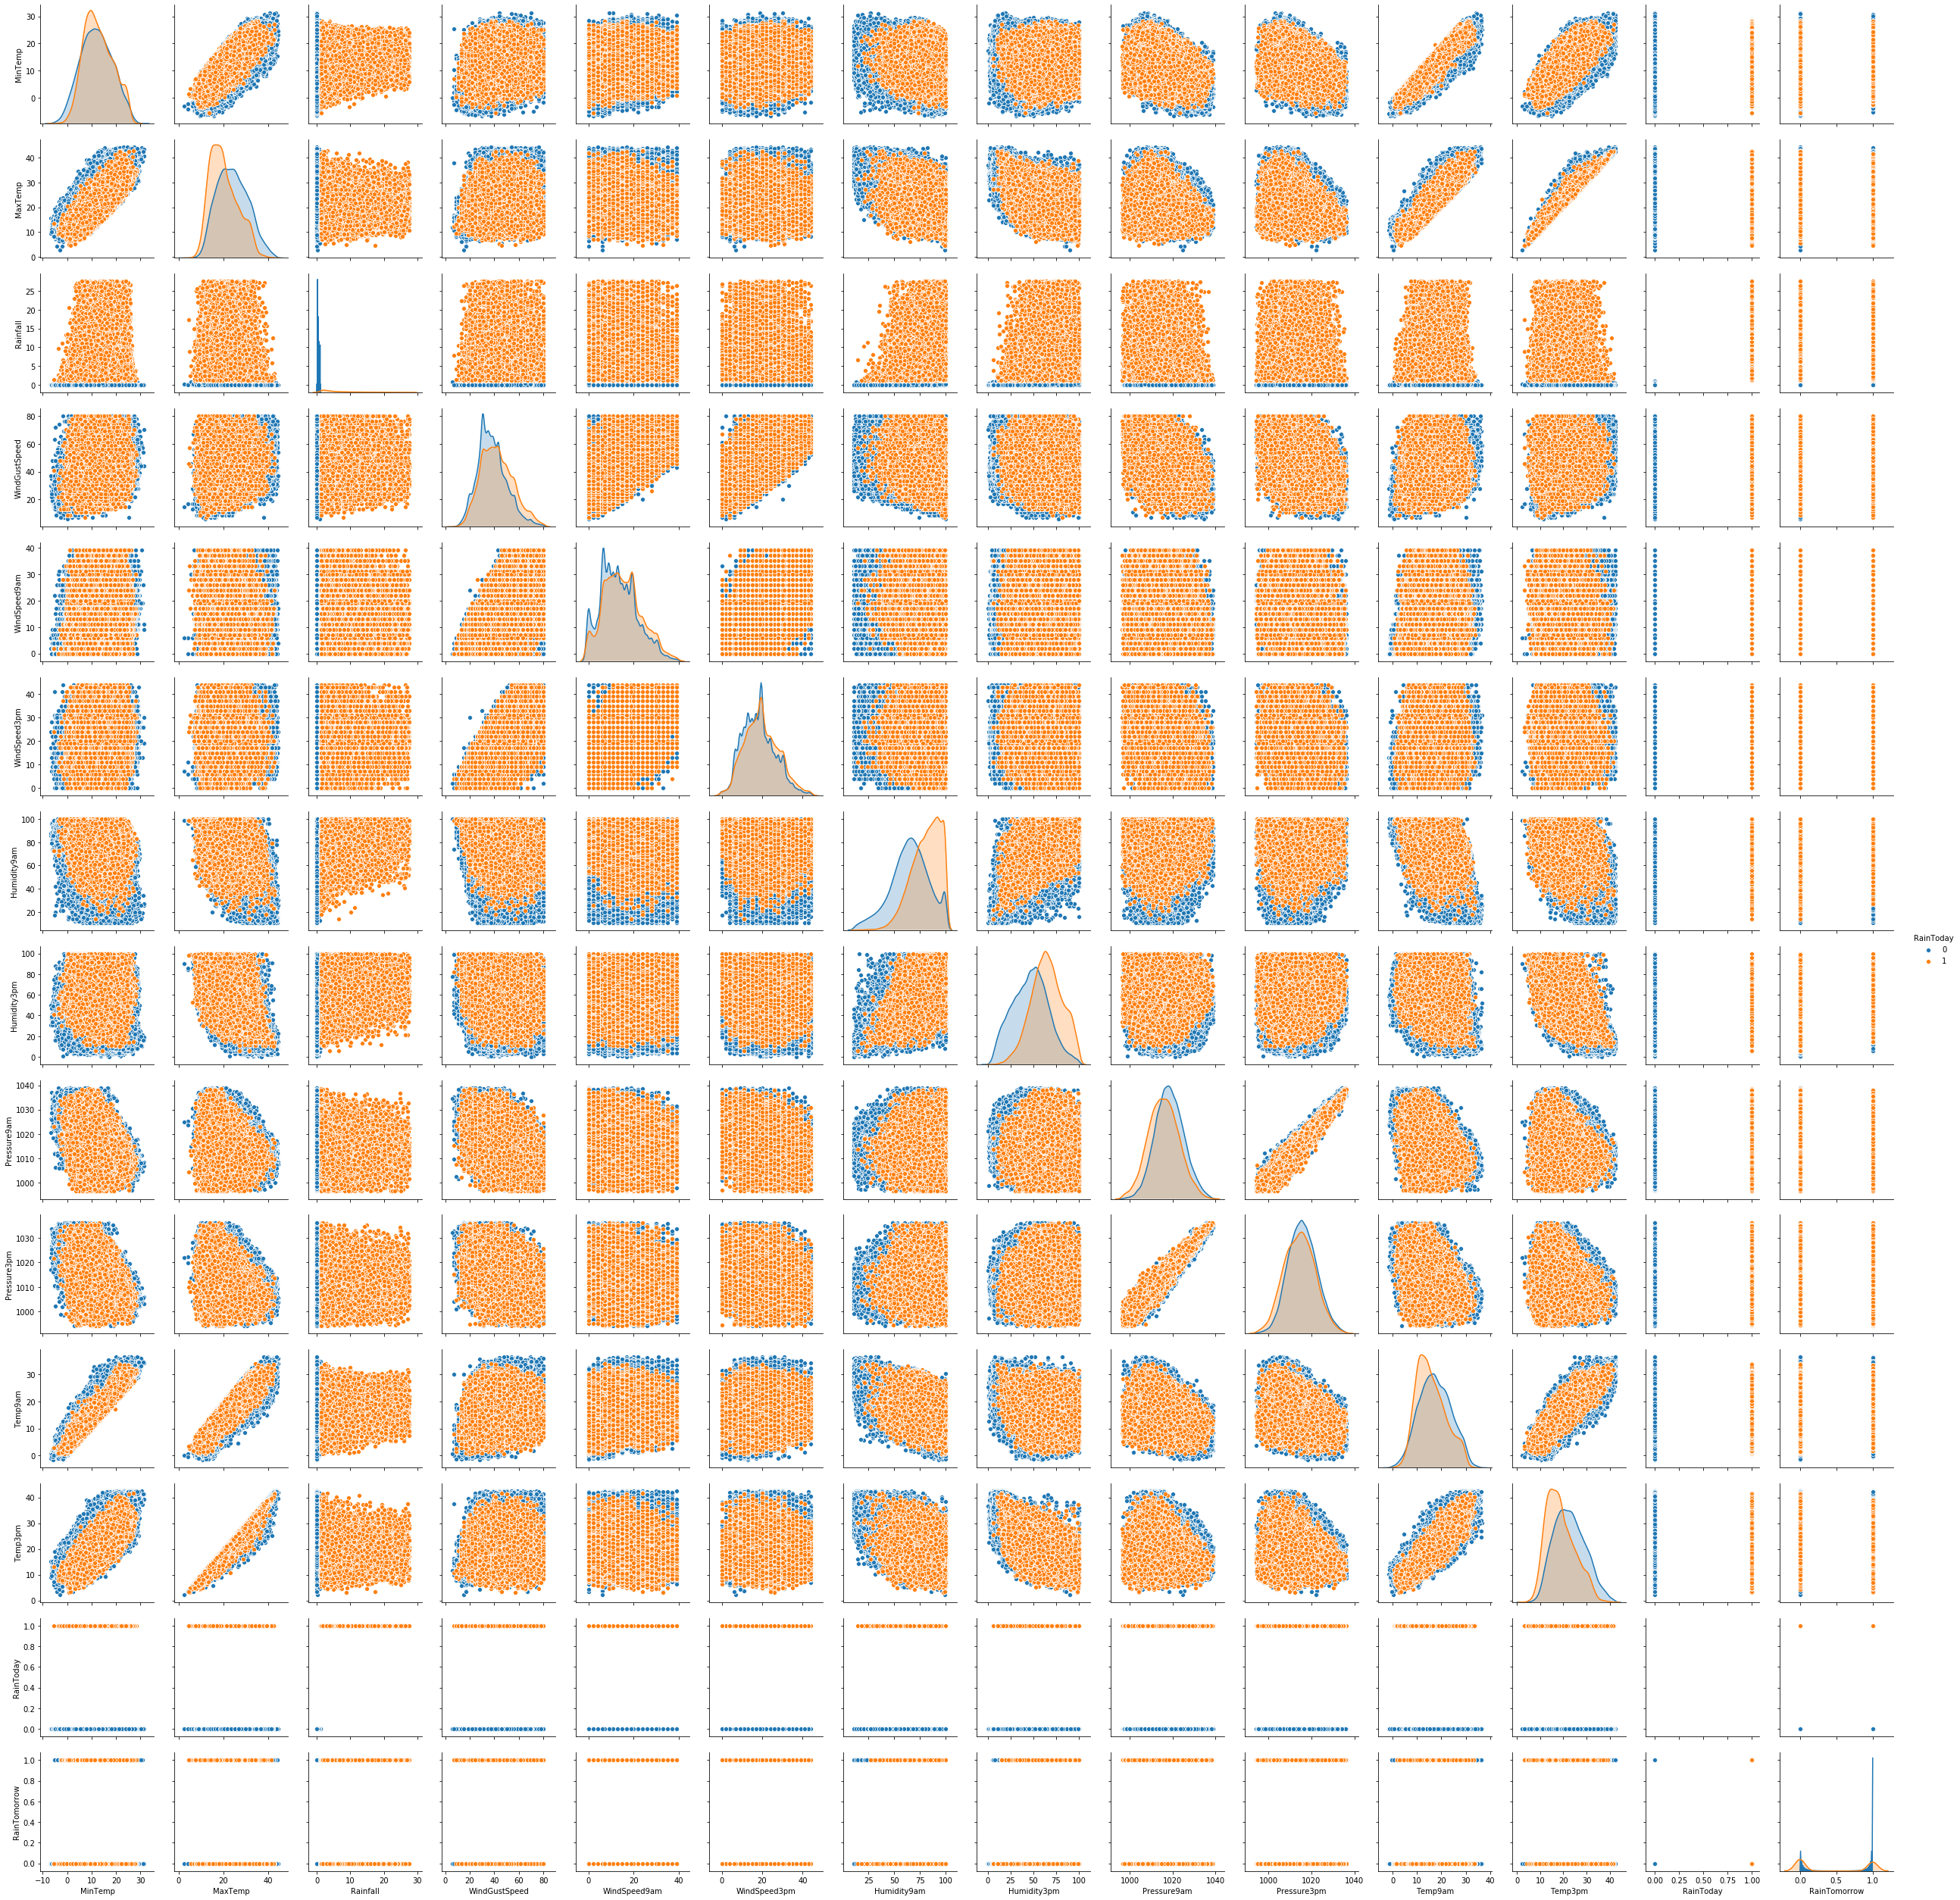

In [6]:
sb.pairplot(db,hue="RainToday")

In [8]:
#     a | b |  c          *oque o comando get_dummies faz*
# 0 | 1 | 0 |  0           'WindGustDir','WindDir9am','WindDir3pm'
# 1 | 0 | 1 |  0
# 2 | 0 | 0 |  1
# 3 | 1 | 0 |  0
X = db.drop(columns=['RainToday'],axis=1)
X = normalize(X, norm='l2')


In [9]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2, random_state=0, max_iter=200000) 
kmeans.fit(X)
db['K-classes']= kmeans.labels_
db

MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0          13.4     22.9       0.6           44.0          20.0          24.0   
1           7.4     25.1       0.0           44.0           4.0          22.0   
2          12.9     25.7       0.0           46.0          19.0          26.0   
3           9.2     28.0       0.0           24.0          11.0           9.0   
4          17.5     32.3       1.0           41.0           7.0          20.0   
...         ...      ...       ...            ...           ...           ...   
142188      3.5     21.8       0.0           31.0          15.0          13.0   
142189      2.8     23.4       0.0           31.0          13.0          11.0   
142190      3.6     25.3       0.0           22.0          13.0           9.0   
142191      5.4     26.9       0.0           37.0           9.0           9.0   
142192      7.8     27.0       0.0           28.0          13.0           7.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
142188         59.0         27.0       1024.7       1021.2      9.4     20.9   
142189         51.0         24.0       1024.6       1020.3     10.1     22.4   
142190         56.0         21.0       1023.5       1019.1     10.9     24.5   
142191         53.0         24.0       1021.0       1016.8     12.5     26.1   
142192         51.0         24.0       1019.4       1016.5     15.1     26.0   

        RainToday  RainTomorrow  K-classes  
0               0             0          0  
1               0             0          0  
2               0             0          0  
3               0             0          0  
4               0             0          0  
...           ...           ...        ...  
142188          0             0          0  
142189          0             0          0  
142190          0             0          0  
142191          0             0          0  
142192          0             0          0  

[114424 rows x 15 columns]

C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\thale\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


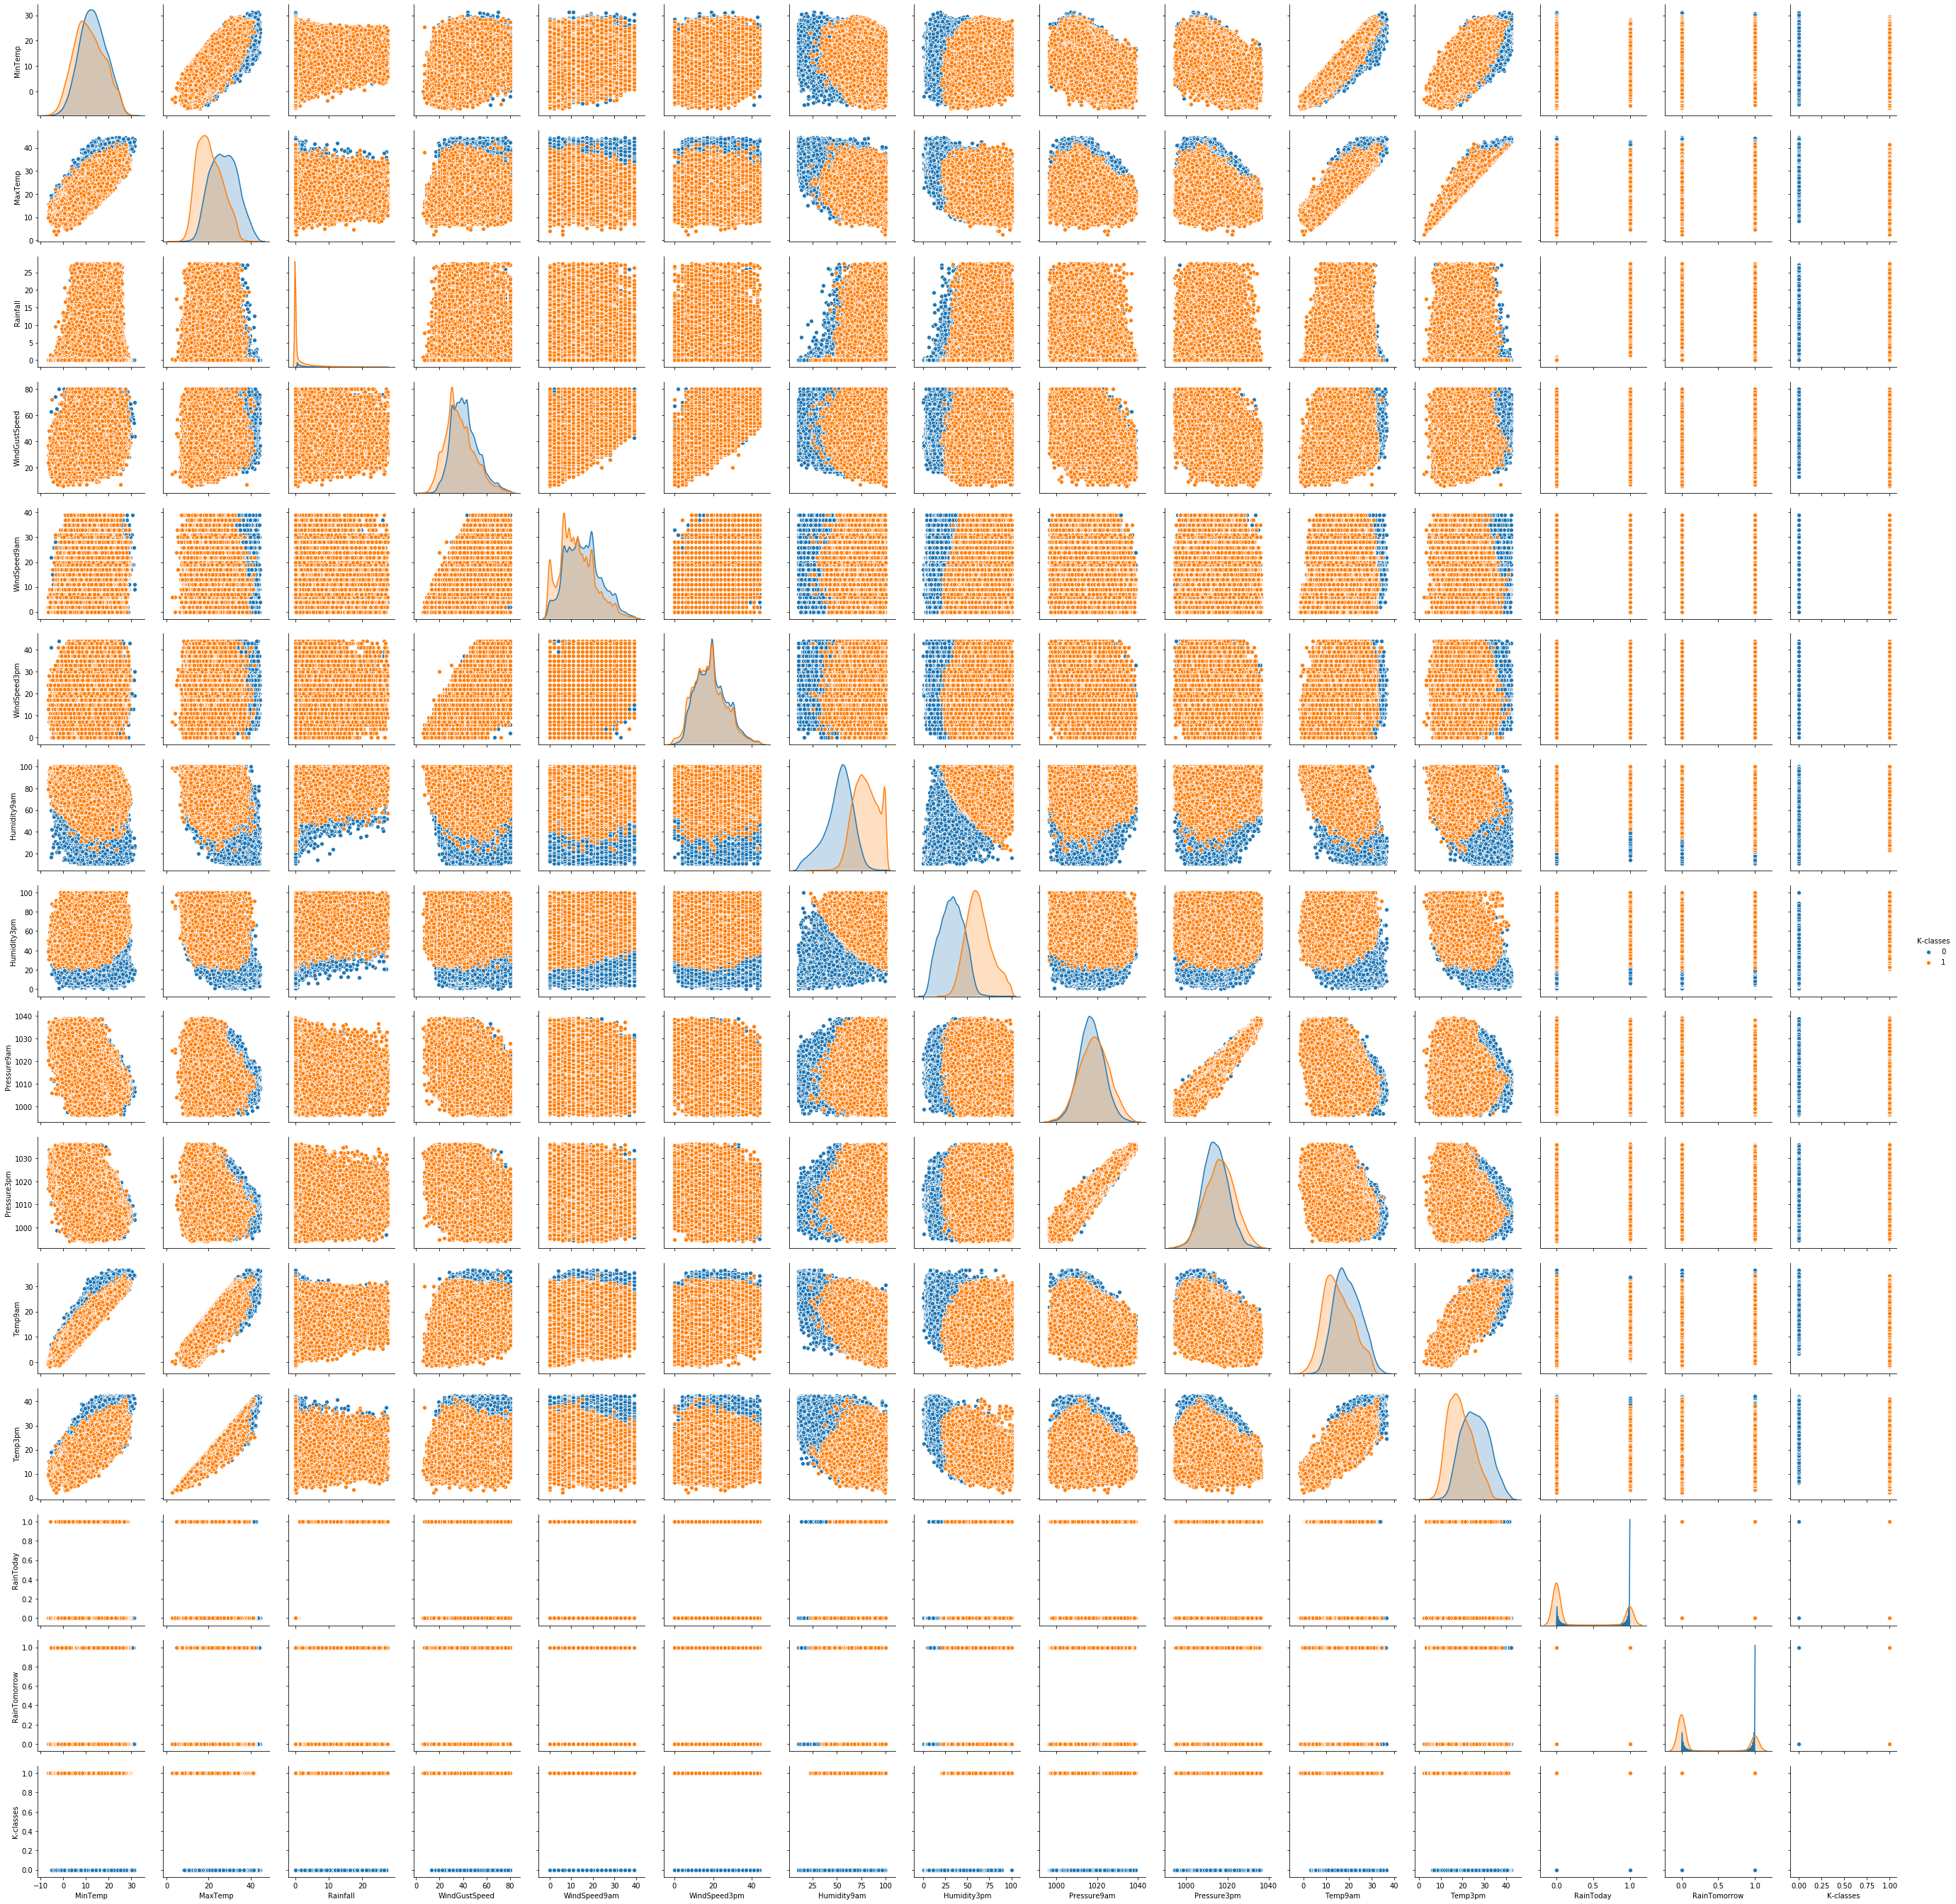

In [10]:
sb.pairplot(db,hue="K-classes")